## Lesson 2- Opening and Manipulating different data files


In this lesson, you will learn how to open, read, manipulate, and write data from different file formats commonly used in data analysis—**.txt**, **.csv**, and **.fits** files.

We will cover:

* Reading files using the `open()` function
* Accessing file content with `.read()`, `.readline()`, and `.readlines()`
* Looping through lines in a file using `for` loops
* Cleaning up text data using `.strip()`
* Storing file contents in lists for processing
* Writing data to files using `open(..., 'w')` and `.write()`
* Appending data to files using `open(..., 'a')`
* Understanding file paths and working with file locations
* Using `with open(...) as f:` for safe and automatic file handling
* Reading and working with **CSV files** using Python’s built-in `csv` module and `pandas`
* Opening and exploring **FITS files** using `astropy.io.fits`


### 📥 Getting the Tutorial Data

Before we begin, we need to download the example data files used in this tutorial.  
The following function will:
- Clone a GitHub repository containing the data,
- Remove any old copies to avoid conflicts,
- Copy `.txt` and `.csv` files into the current working directory.

Run the cell below to set up your environment.

This will load all the data files needed for the lesson.**bold text**

In [1]:
def fetch_data():
  import os, shutil
  cwd = os.getcwd()
  if os.path.exists("CosmicAI_WinterSchool"):
    shutil.rmtree("CosmicAI_WinterSchool")
  !git clone https://github.com/aliawofford9317/CosmicAI_WinterSchool.git
  for file in os.listdir("CosmicAI_WinterSchool"):
    if file.endswith((".txt",".csv")):
      shutil.copy("CosmicAI_WinterSchool/{}".format(file),cwd)
fetch_data()

Cloning into 'CosmicAI_WinterSchool'...
remote: Enumerating objects: 346, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 346 (delta 129), reused 35 (delta 35), pack-reused 155 (from 1)
Receiving objects: 100% (346/346), 15.05 MiB | 17.56 MiB/s, done.
Resolving deltas: 100% (157/157), done.


## Opening and reading different file types

Python allows us to read and write to different file types such as .txt, .csv, and FITs.


Python includes the `open()` function, it has different paramenters:
- 'r' read, opens the file, return an error if not found.
- 'a' append, open the file to write at the end of the file, it will not overwrite.
- 'w' write, writes over the existing file, create a new file if not found.
- 'x' create, creates a new file, returns an error if not found.


## Working with .txt files


Included with this lesson there is a .txt file named 'planetary_data.txt', we will use this file for our example.

In [2]:
data = open('planetary_data.txt')

In [3]:
# Object wrapper
data

<_io.TextIOWrapper name='planetary_data.txt' mode='r' encoding='utf-8'>

In [4]:
data.read()

"Mercury,\tVenus,\tEarth,\tMars,\tJupiter\t\nMean distance from Sun (millions of kilometers),\t57.9,\t108.2,\t149.6,\t227.9,\t778.3\n\t\t\t\t\t\nMean distance from Sun\t36\t67.24\t92.9\t141.71\t483.88\t\t\t\t\t\t\nPeriod of revolution\t88 days\t224.7 days\t365.2 days\t687 days\t11.86 yrs\nInclination of axis\tNear 0°\t3°\t23°27'\t25° 12'\t3° 5'\nInclination of orbit\t7°\t3.4°\t0°\t1.9°\t1.3°\t\t\t\t\t\nEccentricity of orbit\t0.206\t0.007\t0.017\t0.093\t0.048\nEquatorial diameter\t4.880,\t12.100,\t12.756,\t6.794,\t142.800\t\t\t\t\t\nAtmosphere (main components),\tVirtually none,\tCarbon dioxideNitrogenOxygen\tCarbon dioxide,\tHydrogen, helium\t"

In [5]:
# Read the first 10 characters
data = open('planetary_data.txt')
data.read(10)

'Mercury,\tV'

In [6]:
# Read a line
data = open('planetary_data.txt')
data.readline()

'Mercury,\tVenus,\tEarth,\tMars,\tJupiter\t\n'

In [7]:
# Read line by line
data = open('planetary_data.txt')
for x in data:
    print(x)

Mercury,	Venus,	Earth,	Mars,	Jupiter	

Mean distance from Sun (millions of kilometers),	57.9,	108.2,	149.6,	227.9,	778.3

					

Mean distance from Sun	36	67.24	92.9	141.71	483.88						

Period of revolution	88 days	224.7 days	365.2 days	687 days	11.86 yrs

Inclination of axis	Near 0°	3°	23°27'	25° 12'	3° 5'

Inclination of orbit	7°	3.4°	0°	1.9°	1.3°					

Eccentricity of orbit	0.206	0.007	0.017	0.093	0.048

Equatorial diameter	4.880,	12.100,	12.756,	6.794,	142.800					

Atmosphere (main components),	Virtually none,	Carbon dioxideNitrogenOxygen	Carbon dioxide,	Hydrogen, helium	


In [8]:
# Close the reference to the object
data.close()

Let's open a second txt file, which does not include so much text. Open the file called `planetary_data_2.txt`

In [9]:
# Open our second txt file
planets = open('planetary_data_2.txt')
planets.read()

'Body, Radius (km), Mass (10e21 kg), Density (g/cm3), Gravity (m/s2)\nMercury, 2439.4, 60.83, 330.11, 5.4291, 3.70\nVenus,\t6052, 928.43, 4867.5, 5.243, 8.87\nEarth,\t6371.0084, 1083.21, 5972.4, 5.5136, 9.8\t\nMars, 3389.5, 163.18, 641.71, 3.9341, 3.71\nJupiter, 69911, 1431280, 1898187, 1.3262, 24.79'

Let's try to split the radii of planets using the `line.split()` method, this will split or separate our data where an occurrence of a string is found, in this case we will use a comma to split our characters.

In [10]:
bodies = []
radii = []

planets = open('planetary_data_2.txt')

for line in planets:
    splitLine = line.split(',')
    print(splitLine) # print the splitted line
    print(line.strip()) # print the stripped line as String
    bodies.append(splitLine[0])
    radii.append(splitLine[1])
#bodies

['Body', ' Radius (km)', ' Mass (10e21 kg)', ' Density (g/cm3)', ' Gravity (m/s2)\n']
Body, Radius (km), Mass (10e21 kg), Density (g/cm3), Gravity (m/s2)
['Mercury', ' 2439.4', ' 60.83', ' 330.11', ' 5.4291', ' 3.70\n']
Mercury, 2439.4, 60.83, 330.11, 5.4291, 3.70
['Venus', '\t6052', ' 928.43', ' 4867.5', ' 5.243', ' 8.87\n']
Venus,	6052, 928.43, 4867.5, 5.243, 8.87
['Earth', '\t6371.0084', ' 1083.21', ' 5972.4', ' 5.5136', ' 9.8\t\n']
Earth,	6371.0084, 1083.21, 5972.4, 5.5136, 9.8
['Mars', ' 3389.5', ' 163.18', ' 641.71', ' 3.9341', ' 3.71\n']
Mars, 3389.5, 163.18, 641.71, 3.9341, 3.71
['Jupiter', ' 69911', ' 1431280', ' 1898187', ' 1.3262', ' 24.79']
Jupiter, 69911, 1431280, 1898187, 1.3262, 24.79


In [11]:
bodies

['Body', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter']

In [12]:
radii

[' Radius (km)', ' 2439.4', '\t6052', '\t6371.0084', ' 3389.5', ' 69911']

### Writing to an existing file
We can use the `a` and `w` option to append and write:

In [13]:
dat = open('append.txt', 'a')
dat.write('Appending this to the end')
dat.close()
# Go check your append.txt file after this is run
# Remember to close your file if you manually open it

In [14]:
dat = open('append.txt', 'r')
dat.read()

'Overwrite contentsAppending this to the end'

In [15]:
# Overwrites the current file
datos = open('append.txt', 'w')
datos.write('Overwrite contents')

18

In [16]:
datos = open('append.txt', 'r')
datos.read()

'Overwrite contents'

In [17]:
datos.close()

## Working with .csv files
The so-called CSV (Comma Separated Values) format is the most common import and export format for spreadsheets and databases.

We can use Python without any modules to read CSV files, first we need to import the `csv` module using the `import` keyword

In [18]:
# Import the csv module
import csv

with open('cereal.csv', newline='') as csvfile:
    read = csv.reader(csvfile, delimiter=' ')
    for row in read:
        print(', '.join(row))

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%, Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
100%, Natural, Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
All-Bran, with, Extra, Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
Almond, Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843
Apple, Cinnamon, Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541
Apple, Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.174094
Basic, 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562
Bran, Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.120253
Bran, Flakes,P,C,90,3,0,210,5,13,5,190,25,3,1,0.67,53.313813
Cap'n'Crunch,Q,C,120,1,2,220,0,12,12,35,25,2,1,0.75,18.042851
Cheerios,G,C,110,6,2,290,2,17,1,105,25,1,1,1.25,50.764999
Cinnamon, Toast, Crunch,G,C,120,1,3,210,0,13,9,45,25,2,1,0.75,19.823573
Clusters,G,C,110,3,2,140,2,13,7,105,25,3,1,0.5,40.400208
Cocoa, Puffs

## Brief intro to Pandas
The code above works, but for this course we will be using a module named Pandas to work with our CSV data. If you want to know more about the native csv module, check out [this link](https://docs.python.org/3/library/csv.html)

Python is a library used for working with data. It can analyze, clean, explore and manipulate data. Pandas makes reading datasets very easy.

In [19]:
# Run only once to install the Pandas library
# Run this only if you have not added pandas via pip to your environment
#!pip install pandas

In [20]:
# import our newly installed library
import pandas as pd # as pd is a shortname, we us this later

data = pd.read_csv('cereal.csv') # pd shortname
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


You can see the code above is easily more readable and relevant just by using pandas. The `.head()` will show the first 5 rows by default, you can specify how many rows you want to show by typing a different number in the `.head()` method.

In [21]:
data.head(100)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [22]:
# You can define an index column by using the index_col parameter
data = pd.read_csv('cereal.csv', index_col='name')
data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


To call a column simply use the column name

In [23]:
data.calories

,calories
name,
100% Bran,70
100% Natural Bran,120
All-Bran,70
All-Bran with Extra Fiber,50
Almond Delight,110
...,...
Triples,110
Trix,110
Wheat Chex,100


In [24]:
# What data type is this?
type(data)

pandas.core.frame.DataFrame

In [25]:
# And what data data is each of the columns
type(data.calories)

pandas.core.series.Series

In [26]:
# You can also index the dataframe similar to a list
data.iloc[0]

,100% Bran
mfr,N
type,C
calories,70
protein,4
fat,1
sodium,130
fiber,10.0
carbo,5.0
sugars,6
potass,280


In [27]:
data.iloc[15]

,Corn Chex
mfr,R
type,C
calories,110
protein,2
fat,0
sodium,280
fiber,0.0
carbo,22.0
sugars,3
potass,25


In [28]:
# We can also index by index name
data[data.index == 'Trix']

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.0,27.753301


<small><i>
The content of this section of the notebook was originally developed for the SciPy 2014 conference by the Astropy Project contributors, including Thomas Robitaille, Erik Tollerud, Perry Greenfield, Michael Droettboom, Erik Bray, and many others who helped develop the <code>astropy.io.fits</code> module and supporting documentation. It is distributed under the <a href="https://opensource.org/licenses/BSD-3-Clause">BSD 3-Clause License</a>.The contents of this section has been adapted to align with the goals of the COSMICAI initiative, which seeks to broaden access to astronomy data and tools through artificial intelligence and open-source technologies.
</i></small>


## Working with FITS Files
FITS, the Flexible Image Transport System, is an open standard digital file format widely used in astronomy for representing and working with 2D images.


##What is astropy?

The astropy package provides “a common core package for Astronomy in Python” with the intention of fostering “an ecosystem of interoperable astronomy packages”.

The astropy.io.fits package provides access to FITS files. FITS (Flexible Image Transport System) is a portable file standard widely used in the astronomy community to store images and tables. This subpackage was originally developed as PyFITS.

For more information see [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html).


## About the Data
----
This example uses [model of the gamma-ray sky background](data/gll_iem_v02_P6_V11_DIFFUSE.fit) used for the LAT instrument on the Fermi telescope, as well as the *Fermi*/LAT [point source catalog](data/gll_psc_v08.fit).

This example is based on a [model of the gamma-ray sky background](data/gll_iem_v02_P6_V11_DIFFUSE.fit) used by the LAT instrument aboard the Fermi Gamma-ray Space Telescope, along with the *Fermi*/LAT[point source catalog](data/gll_psc_v08.fit).






In [29]:
# Import required libraries and configure inline plotting for Jupyter notebooks

%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

In [30]:
!wget -q -O diffuse_full.fits \
  https://fermi.gsfc.nasa.gov/ssc/data/analysis/software/aux/gll_iem_v02_P6_V11_DIFFUSE.fit


## Reading FITS files and accessing data

Loading a FITS file is simple. Here’s how to open the reduced
background model data:

In [31]:
# Open the full FITS
hdulist = fits.open('diffuse_full.fits')



The object returned, `hdulist`, (an instance of the [HDUList class](http://docs.astropy.org/en/stable/io/fits/api/hdulists.html#hdulist)) functions similarly to a Python list. Each entry corresponds to a Header-Data Unit (HDU) in the FITS file. You can inspect the structure of the FITS file using:

In [32]:
# Show HDU info
hdulist.info()

Filename: diffuse_full.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


As we can see, this file contains two HDUs. The first contains an image cube, the second a table with one column of double-precision floating point values. To access the primary HDU, which contains the main data, you can then do:

In [33]:
hdu = hdulist[0]
hdu

The ``hdu`` object then has two important attributes: ``data``, which behaves
like a Numpy array, can be used to access the data, and ``header``, which
behaves like a dictionary, can be used to access the header information.
First, we can take a look at the data:

In [34]:

hdu.data.shape

(30, 360, 720)

This tells us that it is a 3-d cube. We can now take a peak at the header:

In [35]:
hdu.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

which shows that this is a plate carrée (``-CAR``) projection in galactic
coordinates, and the third axis is photon energy. We can access individual
header keywords using standard item notation:

In [36]:
hdu.header['TELESCOP']

'GLAST'

In [37]:
hdu.header['INSTRUME']

'LAT'

Provided that we started up ``ipython`` with the ``--pylab`` flag, we can plot
one of the slices in photon energy:

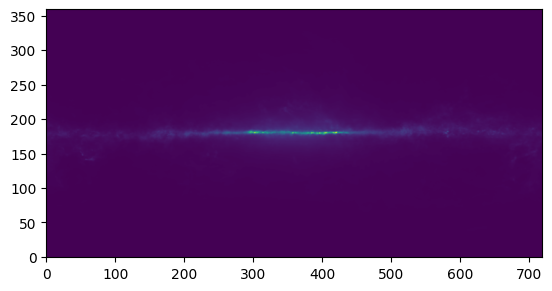

In [38]:
plt.imshow(hdu.data[0, ...], origin='lower')

Note that this is just a plot of an array, so the coordinates are just pixel
coordinates at this stage. The data is stored with longitude increasing to the
right (the opposite of the normal convention), but the Level 3 problem at the
bottom of this page shows how to correctly flip the image.



Modifying data or header information in a FITS file object is easy. We can
update existing header keywords:

In [39]:
hdu.header['TELESCOP'] = "Fermi Gamma-ray Space Telescope"

or add new ones:

In [40]:
hdu.header['MODIFIED'] = '2014-07-06'  # adds a new keyword
hdu.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

and we can also change the data, for example extracting only the first slice
in photon energy:

In [41]:
hdu.data = hdu.data[0,:,:]


Note that this does not change the original FITS file, simply the FITS file
object in memory. Since the data is now 2-dimensional, we can remove the WCS keywords for the third dimension:

In [42]:
hdu.header.remove('CRPIX3')
hdu.header.remove('CRVAL3')
hdu.header.remove('CDELT3')
hdu.header.remove('CUNIT3')
hdu.header.remove('CTYPE3')

## Writing FITS Files

There are two common ways to write a FITS file depending on whether you want to save a single HDU or the entire collection of HDUs from a file:

Writing a single HDU:
If you only want to save a modified portion of the data (e.g., a sliced or downsampled image), you can write just the primary HDU using:

This will create a new FITS file that contains only the single HDU (hdu) — typically the image or data array you've modified or extracted for the tutorial.



In [43]:
hdu.writeto('lat_background_model_slice.fits', overwrite=True)


Writing all HDUs:

If you want to preserve the full structure of the original FITS file, including all HDUs (e.g., image data and any additional tables or metadata), you can write the entire HDUList using:

This saves all Header/Data Units from the original file — including the modified one — into a new FITS file.

In general, use the first method for simplified, tutorial-focused outputs, and the second when maintaining the complete dataset structure is important.



In [44]:
hdulist.writeto('lat_background_model_slice_allhdus.fits', overwrite=True)


Creating a FITS file from scratch
---------------------------------

If you want to create a FITS file from scratch, you need to start off by creating an HDU object:

In [45]:
hdu = fits.PrimaryHDU()

and you can then populate the data and header attributes with whatever information you like:

In [46]:
hdu.data = np.random.random((128, 128))

Note that setting the data automatically populates the header with basic information:

In [47]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  128                                                  
NAXIS2  =                  128                                                  
EXTEND  =                    T                                                  

and you should never have to set header keywords such as ``NAXIS``, ``NAXIS1``, and so on manually. We can then set additional header keywords:

In [48]:
hdu.header['telescop'] = 'Python Observatory'  # Note the keyword is case-insensitive; it will be written all caps

and we can then write out the FITS file to disk:

In [49]:
hdu.writeto('random_array.fits', overwrite=True)

Creating a multi-extension FITS file
------------------------------------

Many observatories format their FITS files such that no data is stored in the primary HDU.  Instead, multiple image extensions are used to store each of the main image data, the data quality array, the error values, etc.  This is the case for all modern HST observations, for example.  The primary HDU stores no data, but does use the primary header to store metadata common to the observation.

As mentioned before, the `HDUList` object is similar to a Python list, and can be manipulated like one to store multiple HDUs as well as reorder them in a FITS file.  For example we can create a primary HDU containing only metadata:

In [50]:
pri_hdu = fits.PrimaryHDU()
pri_hdu.header['telescop'] = 'Python Observatory'

and then create an image extension HDU using the `ImageHDU` class (this is no different from `PrimaryHDU` except that `PrimaryHDU` must come first in an `HDUList`; in fact, in most cases Astropy will ensure that before writing out a multi-extension file the first HDU is converted to a `PrimaryHDU` if possible.):

In [51]:
img_hdu = fits.ImageHDU(data=np.random.random((128, 128)))

Finally, add both HDUs to an `HDUList` and write it to disk:

In [52]:
hdul = fits.HDUList([pri_hdu, img_hdu])
hdul.writeto('random_array2.fits', overwrite=True)

We can check that the output file is in the format we expected with the `fits.info()` convenience function.  This is a shortcut for the pattern we saw earlier of `hdul = fits.open(...); hdul.info()`:

In [53]:
fits.info('random_array2.fits')

Filename: random_array2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 ImageHDU         7   (128, 128)   float64   


Because an `HDUList` is like a Python list, new HDUs can also be appended or inserted:

In [54]:
new_hdu = fits.ImageHDU(data=np.random.random((256, 256)))
hdul.insert(1, new_hdu)
hdul.writeto('random_array3.fits', overwrite=True)

This writes a new FITS file similar to the previous one, but with the new HDU inserted:

In [55]:
fits.info('random_array3.fits')

Filename: random_array3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 ImageHDU         7   (256, 256)   float64   
  2                1 ImageHDU         7   (128, 128)   float64   


Inplace updates
---------------

In all the examples we've seen thus far, modifications have been made to parts of a FITS file and saved by writing out an entirely new FITS file to a different filename.  For large files this can be an expensive and time-consuming operation, especially when only making small changes.

Both the header and data of an existing FITS file can be updated inplace by opening the file with the `mode='update'` option:

In [56]:
hdu_orig = fits.open('diffuse_full.fits')
tile = hdu_orig[0].data[0, 52:52 + 256, 232:232 + 256]

hdul = fits.open('random_array3.fits', mode='update')  # Update the file from the previous example
hdul[0].header['OBSERVER'] = 'Vera Rubin'
hdul[1].data = tile                                    # Replace some or all of the data values
hdul.close()                                           # Close the file to see that all changes were saved


Confirm that the file was updated:

In [57]:
hdul = fits.open('random_array3.fits')
hdul.info()

Filename: random_array3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 ImageHDU         7   (256, 256)   float32   
  2                1 ImageHDU         7   (128, 128)   float64   


In [58]:
hdul[0].header['OBSERVER']


'Vera Rubin'

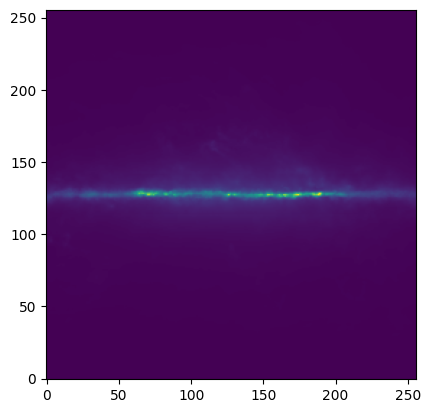

In [59]:
plt.imshow(hdul[1].data, origin='lower')

One caveat about this is that if the file needs to be *resized* as the result of an update (many header cards were added or removed, or the size of the data was changed) this may still result in the file being rewritten.  This happens automatically in the background, but may be more time consuming than modifications that don't significantly change the size of the file.

If you're familiar with Python's `with` statement, this can also be used when updating FITS files.  This is a good idea to ensure that the file is closed/saved once all updates are complete:

In [60]:
with fits.open('random_array3.fits') as hdul:
    hdul[0].header['DATE-OBS'] = '2014-07-06'

Convenience functions
---------------------

Like `fits.info`, a few other shortcut "convenience" functions are provided.  For example, in cases where you just want to access the data or header in a specific HDU, you can use the following convenience functions:

In [61]:
data = fits.getdata('diffuse_full.fits')
header = fits.getheader('diffuse_full.fits')
#print(data)

To get the data or header for an HDU other than the first, you can specify the
extension name or index. The second HDU is called ``energies``, so we can do:

In [62]:
data = fits.getdata('diffuse_full.fits', extname='energies')
#print(data)

or:

In [63]:
data = fits.getdata('diffuse_full.fits', ext=1)
#print(data)

and similarly for ``getheader``.  The documentation provides [a list](http://docs.astropy.org/en/stable/io/fits/api/files.html#writeto) of other such functions.

**Note:** While these functions are useful and convenient for interactive sessions, directly manipulating the data structures returned by `fits.open` as described above is currently more performant and should be preferred for automated scripts.

Accessing Tabular Data
----------------------

Tabular data behaves very similarly to image data such as that shown above,
but the data array is a structured Numpy array which requires column access
via the item notation:

In [64]:
!wget -q -O diffuseTabular_full.fits \
   https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2yr_catalog/gll_psc_v08.fit


In [65]:
from astropy.io import fits
hdulist = fits.open('diffuseTabular_full.fits')

In [66]:
hdulist[1].name

'LAT_Point_Source_Catalog'

Display information on the first five columns (or all columns without the slice notation, but there are many in this table):

In [67]:
hdulist[1].columns[:5]

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
)

In [68]:
hdulist[1].data['RAJ2000']

array([2.3371103e-01, 4.3884927e-01, 6.7981201e-01, ..., 3.5975943e+02,
       3.5985989e+02, 3.5990692e+02], dtype='>f4')

In [69]:
hdulist[1].data['DEJ2000']

array([ -7.815498, -41.99648 ,  62.339626, ..., -30.625168,  67.863335,
        65.73054 ], dtype='>f4')

FITS tables can also be accessed via Astropy's `Table` interface like we saw earlier:

In [70]:
from astropy.table import Table

t = Table.read('diffuseTabular_full.fits')

Note that if a FITS file contains a table, the first table in the file is returned by default.  The `hdu=` keyword argument to `Table.read` can be used to specify and HDU to read from.

In [71]:
t[t.colnames[:5]]  # Display the first 5 columns

Source_Name,RAJ2000,DEJ2000,GLON,GLAT
,deg,deg,deg,deg
bytes18,float32,float32,float32,float32
2FGL J0000.9-0748,0.2337,-7.8155,88.8292,-67.2805
2FGL J0001.7-4159,0.4388,-41.9965,334.0756,-71.9967
2FGL J0002.7+6220,0.6798,62.3396,117.3117,0.0008
2FGL J0004.2+2208,1.0557,22.1365,108.7321,-39.4298
2FGL J0004.7-4736,1.1802,-47.6116,323.8899,-67.5710
2FGL J0006.1+3821,1.5252,38.3502,113.2445,-23.6672
2FGL J0007.0+7303,1.7735,73.0545,119.6652,10.4647
2FGL J0007.7+6825c,1.9251,68.4232,118.9111,5.8937


In a future version of Astropy, FITS tables will always be returned in this format.  At present, however, there remain some issues with supporting all FITS tables with the `Table` class.

## 🛑 End of Lesson 2: Opening and Manipulating Data for .txt , .csv and fits file types

Please complete the following Tasks:

- ✅ **Lesson 2 Terminology Quiz**
- ✅ **Lesson 2 Coding Exercises**

📩 Submit all solutions to your instructor once complete.